In [1]:
import os
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [2]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [3]:
X_train = []
Y_train = []
image_size = 150
labels = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
for i in labels:
    folderPath = os.path.join('../Alzheimer/train',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../Alzheimer/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(6400, 150, 150, 3)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))

model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add early stopping to the fit function
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[early_stop])


Epoch 1/20
162/162 [==============================] - 202s 1s/step - loss: 0.5974 - accuracy: 0.7380 - val_loss: 0.5657 - val_accuracy: 0.7691
Epoch 2/20
162/162 [==============================] - 213s 1s/step - loss: 0.5515 - accuracy: 0.7650 - val_loss: 0.5914 - val_accuracy: 0.7292
Epoch 3/20
162/162 [==============================] - 215s 1s/step - loss: 0.4972 - accuracy: 0.7876 - val_loss: 0.4406 - val_accuracy: 0.8056
Epoch 4/20
162/162 [==============================] - 214s 1s/step - loss: 0.4719 - accuracy: 0.7996 - val_loss: 0.4077 - val_accuracy: 0.8403
Epoch 5/20
162/162 [==============================] - 214s 1s/step - loss: 0.4567 - accuracy: 0.8175 - val_loss: 0.3908 - val_accuracy: 0.8455
Epoch 6/20
162/162 [==============================] - 210s 1s/step - loss: 0.4061 - accuracy: 0.8310 - val_loss: 0.3562 - val_accuracy: 0.8559
Epoch 7/20
162/162 [==============================] - 215s 1s/step - loss: 0.3720 - accuracy: 0.8561 - val_loss: 0.3239 - val_accuracy: 0.8767

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

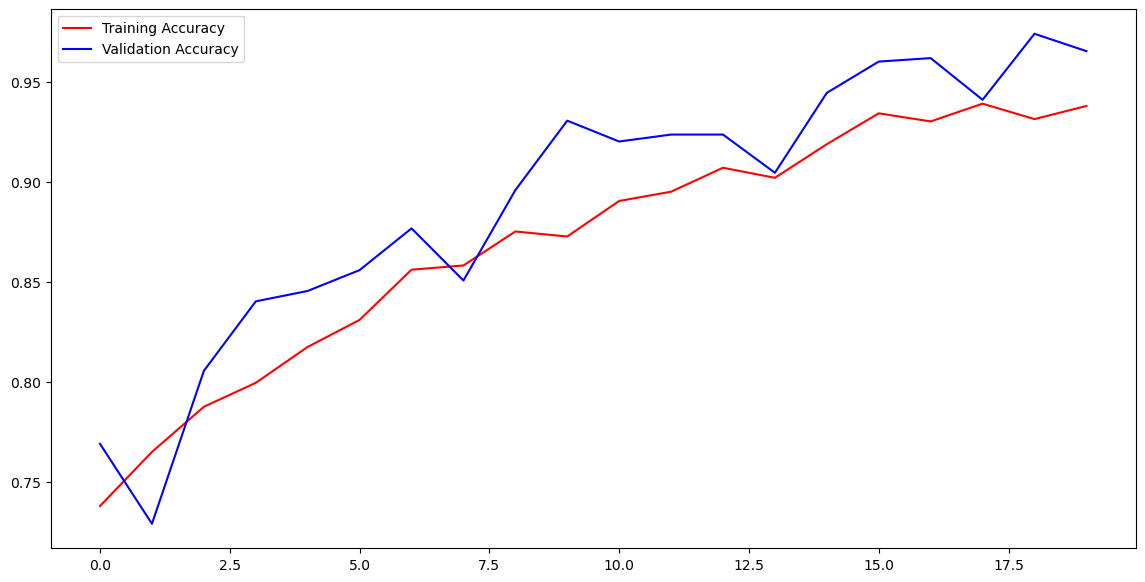

In [18]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

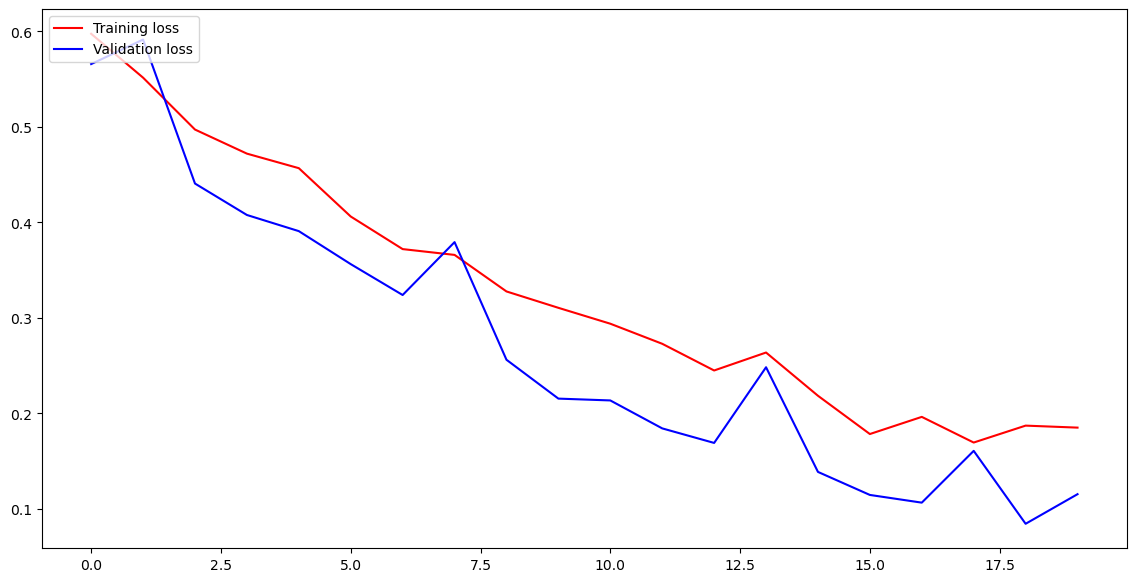

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [32]:
img = cv2.imread('../Alzheimer/test/MildDemented/32.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [33]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

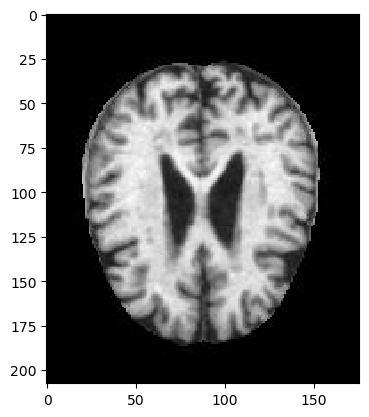

In [34]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../Alzheimer/test/MildDemented/32.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [35]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 45ms/step


0

In [37]:
from keras.models import load_model
model.save('alzheimer2.h5')

In [38]:
loaded_model = load_model('alzheimer2.h5')
a = loaded_model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 353ms/step


0

In [39]:
import pickle

# Save training history
with open('Alhistory.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [40]:
import pickle

# Load training history
with open('Alhistory.pkl', 'rb') as file:
    loaded_history = pickle.load(file)
    print(loaded_history)

{'loss': [0.5974348783493042, 0.5514848232269287, 0.49715113639831543, 0.4719422459602356, 0.45670950412750244, 0.4060986042022705, 0.3719807267189026, 0.3659026324748993, 0.3276364505290985, 0.3104877173900604, 0.29385626316070557, 0.27283596992492676, 0.2448786348104477, 0.2636832594871521, 0.21841515600681305, 0.1783408373594284, 0.19630298018455505, 0.16943524777889252, 0.18714529275894165, 0.18505217134952545], 'accuracy': [0.7380401492118835, 0.7650462985038757, 0.7876157164573669, 0.7995756268501282, 0.8175154328346252, 0.8310185074806213, 0.8560956716537476, 0.8582175970077515, 0.8751928806304932, 0.8726851940155029, 0.8904321193695068, 0.895061731338501, 0.9070215821266174, 0.9020061492919922, 0.9187885522842407, 0.9342206716537476, 0.9301697611808777, 0.9390432238578796, 0.9313271641731262, 0.9378858208656311], 'val_loss': [0.5657145977020264, 0.5913735628128052, 0.4406176805496216, 0.40770184993743896, 0.3907912075519562, 0.35624903440475464, 0.3239087462425232, 0.3792768120